# Objectives of Notebook 📌
👉 This notebook aims to:

Dataset exploration using various types of data visualization.
Build various ML models that can predict whether patients has heart disease or not.

**👨‍💻 The machine learning models used in this project are:**

1.   Logistic Regression
1.   K-Nearest Neighbour (KNN)  
1.   Support Vector Machine (SVM)
2.   Gaussian Naive Bayes
5.   Decision Tree
6.   Random Forest
7.   Grandient Boost



# 2. Importing Libraries 📚
👉 Importing libraries that will be used in this notebook.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import os

# 3. Reading Data Set 👓
👉 After importing libraries, we will also import the dataset that will be used and show the first 6 rows.

In [5]:
df = pd.read_csv("/content/sample_data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# 4. Dataset Exploration 🔍
👉 This section will explore the data set that has been imported.

In [7]:
# Target Distribution
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

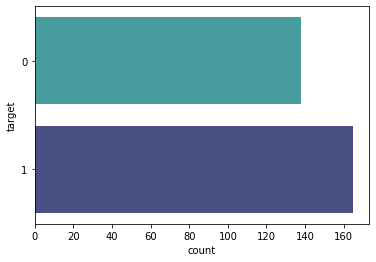

In [8]:
sns.countplot(y="target", data=df, palette="mako_r")
plt.show()

In [9]:
countTdkSakit = len(df[df.target == 0])
countSakit = len(df[df.target == 1])
print("Percentage of patients who are not sick: {:.2f}%".format((countTdkSakit / (len(df.target))*100)))
print("Percentage of patients who are sick: {:.2f}%".format((countSakit / (len(df.target))*100)))

Percentage of patients who are not sick: 45.54%
Percentage of patients who are sick: 54.46%


# 👉 From the results above, it can be seen that the number of patients that has heart disease are higher than healthy patients.

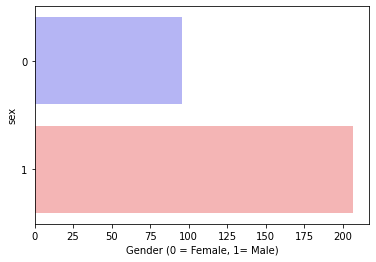

In [10]:
#Gender Distribution

sns.countplot(y='sex', data=df, palette="bwr")
plt.xlabel("Gender (0 = Female, 1= Male)")
plt.show()

In [11]:
countWanita = len(df[df.sex == 0])
countPria = len(df[df.sex == 1])
print("Female percentage: {:.2f}%".format((countWanita / (len(df.sex))*100)))
print("Male percentage: {:.2f}%".format((countPria / (len(df.sex))*100)))

Female percentage: 31.68%
Male percentage: 68.32%


**👉 From the results above, it can be seen that the number male patients are higher than female patients.**

In [12]:
#  Numerical Distribution 📈
df.groupby('target').mean().T

target,0,1
age,56.601449,52.496970
sex,0.826087,0.563636
cp,0.478261,1.375758
trestbps,134.398551,129.303030
chol,251.086957,242.230303
fbs,0.159420,0.139394
restecg,0.449275,0.593939
thalach,139.101449,158.466667
exang,0.550725,0.139394
oldpeak,1.585507,0.583030


**👉 Results above shows the mean of each numeric column based on the target column.**

# Heart Disease Frequency based on Age 💉👴

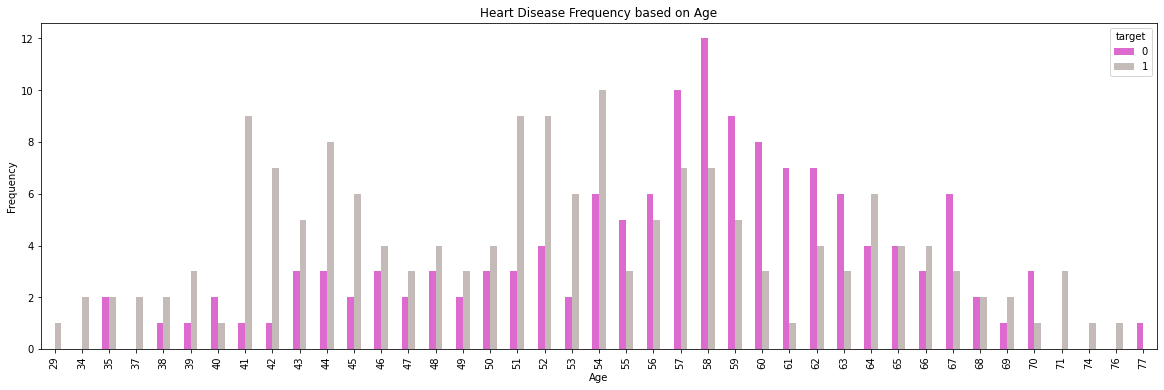

In [13]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6), color=['#DC6ACF','#C4BBB8' ])
plt.title('Heart Disease Frequency based on Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**👉 Patients who have the most heart disease are in the age range of 41 to 54 years.
👉 While patients who do not have heart disease are mostly in the age range of 54 to 64 years.**

#  Heart Disease Frequency based on Gender 💉👫

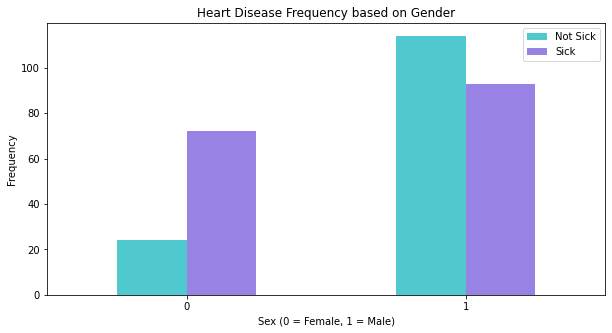

In [14]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['#50C9CE','#9883E5'])
plt.title('Heart Disease Frequency based on Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Not Sick", "Sick"])
plt.ylabel('Frequency')
plt.show()

**👉 It can be seen that the number of patients with heart disease in women is dominant.
👉 Meanwhile, in men, the number of patients who do not have heart disease is higher.**

**Scatter Plot based on Age 👴**

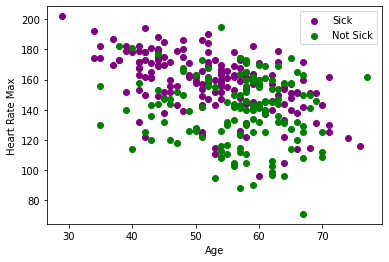

In [15]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="purple")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="green")
plt.legend(["Sick", "Not Sick"])
plt.xlabel("Age")
plt.ylabel("Heart Rate Max")
plt.show()

*👉 The scatter plot above shows the distribution of patients who have/do not have heart disease based on age*

**Heart Disease Frequency based on Slope 👨‍⚕️**

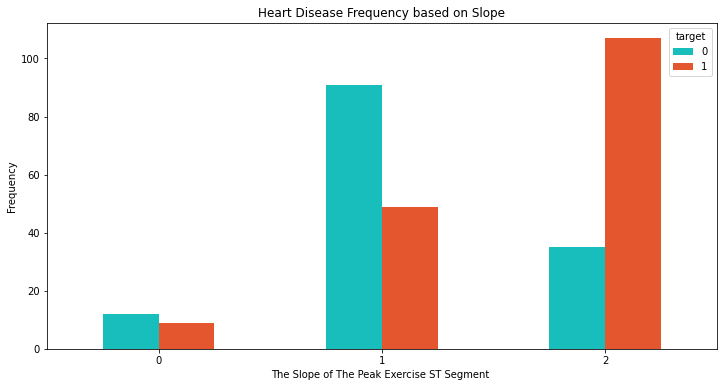

In [16]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(12,6),color=['#17BEBB','#E4572E'])
plt.title('Heart Disease Frequency based on Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

👉 The number of patients who have heart disease is higher on slope number 2.
  
    👉 While the number of patients who do not have heart disease is more on  slope number 1.

**Heart Disease Frequency According To FBS 🩸**

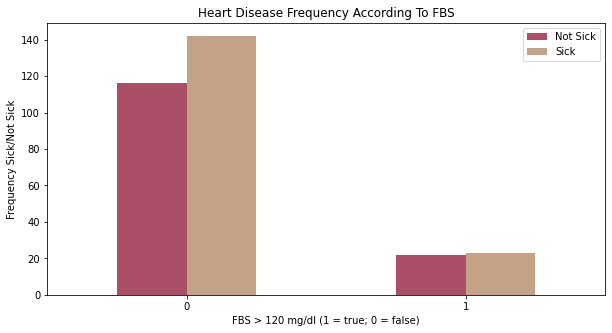

In [17]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(10,5),color=['#AB4E68','#C4A287' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS > 120 mg/dl (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Not Sick", "Sick"])
plt.ylabel('Frequency Sick/Not Sick')
plt.show()

👉 The number of patients who have / do not have heart disease is higher in those who do not do fasting blood sugar.

**Heart Disease Frequency According To Chest Pain Type 😷**

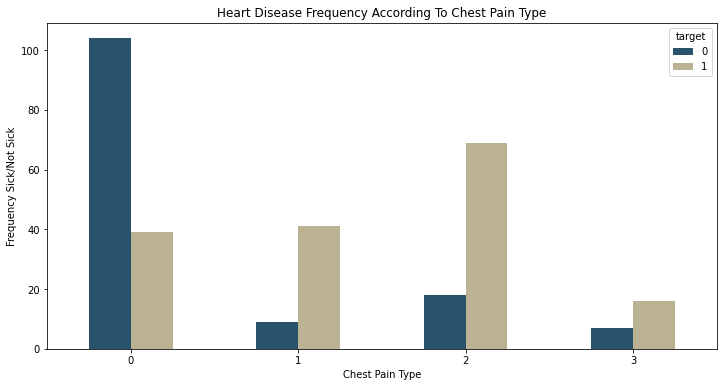

In [18]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(12,6),color=['#28536B','#BBB193' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency Sick/Not Sick')
plt.show()

👉 Chest pain type level 0 has higher number of patients that don't have heart disease.                             
👉 While chest pain type level 2 has higher number of patients that have heart disease.

##5. Dataset Preparation ⚙##
👉 This section will prepare the dataset before building the machine learning models.

Creating Dummy Variables 🔧¶                                                              
👉 Transforming categorical variables using one-hot encoding technique.

In [19]:
cp = pd.get_dummies(df['cp'], prefix = "cp")
thal = pd.get_dummies(df['thal'], prefix = "thal")
slope = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


** Dropping Unnecessary Variables🔻**                                           
👉 The variables that unnecessary will be deleted.

In [20]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


# **Models 🛠**

**Logistic Regression w/ Normalization**

iteration: 100
cost: 0.3597736123664534


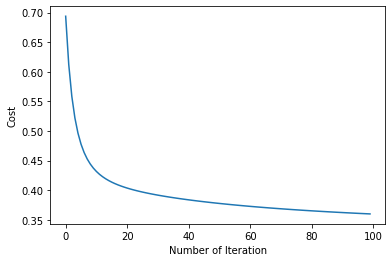

Manuel Test Accuracy: 86.89%
Test Accuracy 86.89%


In [21]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

#Normalization
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

def initialize(dimension):
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias
  
#Sigmoid Function
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head
  
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    return cost,gradients
  
  
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        costList.append(cost)
        index.append(i)
    parameters = {"weight": weight,"bias": bias}
    print("iteration:",iteration)
    print("cost:",cost)
    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients
  
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)
    y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

  
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)
    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)/100*100))
    
logistic_regression(x_train,y_train,x_test,y_test,1,100)

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy {:.2f}%".format(lr.score(x_test.T,y_test.T)*100))

**K-Nearest Neighbour (KNN)**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)
print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 77.05%


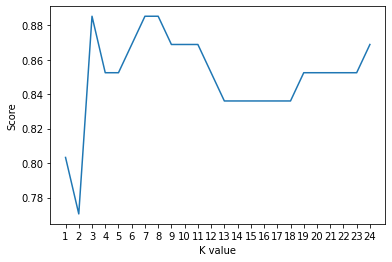

KNN Score Max 88.52%


In [23]:
scoreList = []
for i in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,25), scoreList)
plt.xticks(np.arange(1,25,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
print("KNN Score Max {:.2f}%".format((max(scoreList))*100))

**SVM**

In [24]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

SVC(random_state=1)

In [25]:
print("SVM ALgorithm Test Accuracy: {:.2f}%".format(svm.score(x_test.T,y_test.T)*100))

SVM ALgorithm Test Accuracy: 88.52%


**Gaussian Naive Bayes**

In [26]:
from sklearn.naive_bayes import GaussianNB
nbg = GaussianNB()
nbg.fit(x_train.T, y_train.T)
print("Accuracy of Gaussian Naive Bayes: {:.2f}%".format(nbg.score(x_test.T,y_test.T)*100))

Accuracy of Gaussian Naive Bayes: 86.89%


**Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test.T, y_test.T)*100))

Decision Tree Test Accuracy 75.41%


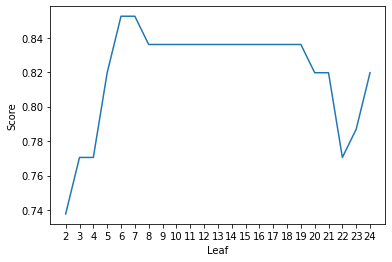

DT Score Max 85.25%


In [28]:
scoreListDT = []
for i in range(2,25):
    dtc2 = DecisionTreeClassifier(max_leaf_nodes=i)
    dtc2.fit(x_train.T, y_train.T)
    scoreListDT.append(dtc2.score(x_test.T, y_test.T))
    
plt.plot(range(2,25), scoreListDT)
plt.xticks(np.arange(2,25,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
print("DT Score Max {:.2f}%".format((max(scoreListDT))*100))

**Random Forest**

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test.T,y_test.T)*100))

Random Forest Algorithm Accuracy Score : 88.52%


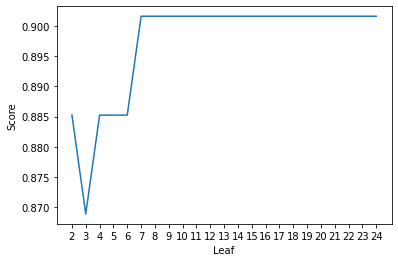

RF Score Max 90.16%


In [30]:
scoreListRF = []
for i in range(2,25):
    rf2 = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    rf2.fit(x_train.T, y_train.T)
    scoreListRF.append(rf2.score(x_test.T, y_test.T))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
print("RF Score Max {:.2f}%".format((max(scoreListRF))*100))

**Gradient Boosting**

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [32]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [33]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(x_train.T,y_train.T)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [34]:
RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [35]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=2, n_estimators=200)
0.8349358974358975
{'n_estimators': 200, 'max_leaf_nodes': 2, 'max_depth': 5}
6


In [36]:
GBclassifier = GradientBoostingClassifier(n_estimators=100, max_depth=1, max_leaf_nodes=20)
GBclassifier.fit(x_train.T, y_train.T)

y_pred = GBclassifier.predict(x_test.T)

print(classification_report(y_test.T, y_pred))
print(confusion_matrix(y_test.T, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test.T)
print('Gradient Boosting accuracy is: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[23  4]
 [ 5 29]]
Gradient Boosting accuracy is: 85.25%


#  Model Comparison 👀

In [37]:
compare = pd.DataFrame({'Model': ["Logistic Regression", "KNN", "SVM", "Gaussian NB", "Decision Tree", "Random Forest"
                                 , "Gradient Boosting"], 
                        'Accuracy': [86.89, 88.52, 88.52, 86.89, 85.25, 90.16, 85.25]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest,90.16
1,KNN,88.52
2,SVM,88.52
0,Logistic Regression,86.89
3,Gaussian NB,86.89
4,Decision Tree,85.25
6,Gradient Boosting,85.25


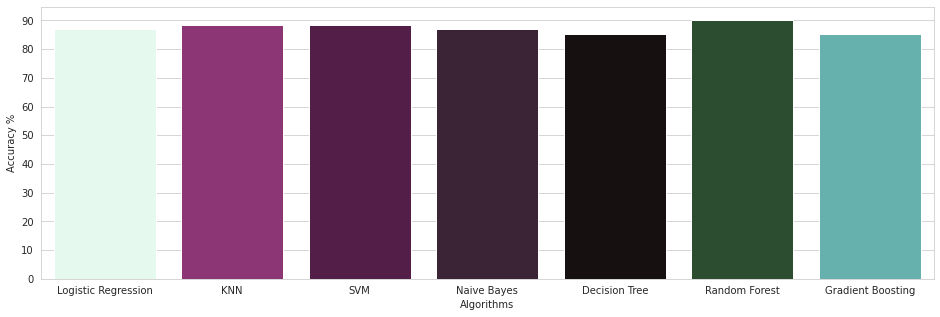

In [38]:
methods = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest", "Gradient Boosting"]
accuracy = [86.89, 88.52, 88.52, 86.89, 85.25, 90.16, 85.25]
colors = ["#E2FCEF", "#9B287B", "#5C164E", "#402039","#170F11","#26532B", "#5ABCB9"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

👉 As can be seen that Random Forest can achieved 90% accuracy.

# Output 📤
👉 This step will make output results in csv file

**Transforming prediction in appropriate output format 🧹**

In [39]:
rf_fin = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=8)
rf_fin.fit(x_train.T, y_train.T)
pred = rf_fin.predict(x_test.T)

In [40]:
prediction = pd.DataFrame({'age': x_test.T.loc[:,"age"], 
                           'sex': x_test.T.loc[:,"sex"], 
                           'trestbps': x_test.T.loc[:,"trestbps"], 
                           'chol': x_test.T.loc[:,"chol"],
                           'fbs': x_test.T.loc[:,"fbs"],
                           'restecg': x_test.T.loc[:,"restecg"],
                           'thalach': x_test.T.loc[:,"thalach"],
                           'exang': x_test.T.loc[:,"exang"],
                           'oldpeak': x_test.T.loc[:,"oldpeak"],
                           'ca': x_test.T.loc[:,"ca"],
                           'cp_0': x_test.T.loc[:,"cp_0"],
                           'cp_1': x_test.T.loc[:,"cp_1"],
                           'cp_2': x_test.T.loc[:,"cp_2"],
                           'cp_3': x_test.T.loc[:,"cp_3"],
                           'thal_0': x_test.T.loc[:,"thal_0"],
                           'thal_1': x_test.T.loc[:,"thal_1"],
                           'thal_2': x_test.T.loc[:,"thal_2"],
                           'thal_3': x_test.T.loc[:,"thal_3"],
                           'slope_0': x_test.T.loc[:,"slope_0"],
                           'slope_1': x_test.T.loc[:,"slope_1"],
                           'slope_2': x_test.T.loc[:,"slope_2"],
                           'target': pred})

In [41]:
#cp
prediction['cp_0'] = prediction['cp_0'].replace([1, 0],['0',''])
prediction['cp_1'] = prediction['cp_1'].replace([1, 0],['1', ''])
prediction['cp_2'] = prediction['cp_2'].replace([1, 0],['2', ''])
prediction['cp_3'] = prediction['cp_3'].replace([1, 0],['3', ''])

prediction['cp_0'] = np.where((prediction['cp_0'] == ''), prediction['cp_1'], prediction['cp_0'])
prediction['cp_0'] = np.where((prediction['cp_0'] == ''), prediction['cp_2'], prediction['cp_0'])
prediction['cp_0'] = np.where((prediction['cp_0'] == ''), prediction['cp_3'], prediction['cp_0'])

#thal
prediction['thal_0'] = prediction['thal_0'].replace([1, 0],['0',''])
prediction['thal_1'] = prediction['thal_1'].replace([1, 0],['1', ''])
prediction['thal_2'] = prediction['thal_2'].replace([1, 0],['2', ''])
prediction['thal_3'] = prediction['thal_3'].replace([1, 0],['3', ''])

prediction['thal_0'] = np.where((prediction['thal_0'] == ''), prediction['thal_1'], prediction['thal_0'])
prediction['thal_0'] = np.where((prediction['thal_0'] == ''), prediction['thal_2'], prediction['thal_0'])
prediction['thal_0'] = np.where((prediction['thal_0'] == ''), prediction['thal_3'], prediction['thal_0'])

#slope
prediction['slope_0'] = prediction['slope_0'].replace([1, 0],['0',''])
prediction['slope_1'] = prediction['slope_1'].replace([1, 0],['1', ''])
prediction['slope_2'] = prediction['slope_2'].replace([1, 0],['2', ''])

prediction['slope_0'] = np.where((prediction['slope_0'] == ''), prediction['slope_1'], prediction['slope_0'])
prediction['slope_0'] = np.where((prediction['slope_0'] == ''), prediction['slope_2'], prediction['slope_0'])

# Drop columns
prediction = prediction.drop(['cp_1', 'cp_2', 'cp_3', 'thal_1', 'thal_2', 'thal_3',
                 'slope_1', 'slope_2'], axis = 1)

In [42]:
# Rename columns name
new_name = {'cp_0': 'cp', 'thal_0': 'thal', 'slope_0': 'slope'}
prediction.rename(columns=new_name, inplace=True)

# Make the prediction file (CSV)

In [43]:
prediction.to_csv('prediction.csv', index=False)
predictioncsv = pd.read_csv('./prediction.csv')
predictioncsv.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp,thal,slope,target
0,0.854167,1.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.00,0,3,0,0
1,0.729167,1.0,0.716981,0.230594,0.0,0.0,0.641221,0.0,0.096774,0.00,3,3,1,1
2,0.625000,1.0,0.716981,0.369863,0.0,0.0,0.671756,0.0,0.032258,0.00,3,3,1,1
3,0.645833,1.0,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.25,0,3,1,0
4,0.687500,1.0,0.339623,0.239726,0.0,0.5,0.572519,0.0,0.290323,0.75,2,3,1,0
